In [102]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from itertools import combinations

%config InlineBackend.figure_format = 'retina'

In [33]:
with open("data/train_labels_sparse.pickle", "rb") as f:
    train_labels = pickle.load(f)

In [34]:
train_labels

<15539x3994 sparse matrix of type '<class 'numpy.bool_'>'
	with 82558 stored elements in COOrdinate format>

## Labels per example dist

In [68]:
labels_per_example = np.array(train_labels.sum(axis=1))

In [69]:
hist = pd.Series(labels_per_example.flatten()).value_counts()

Text(0, 0.5, 'count')

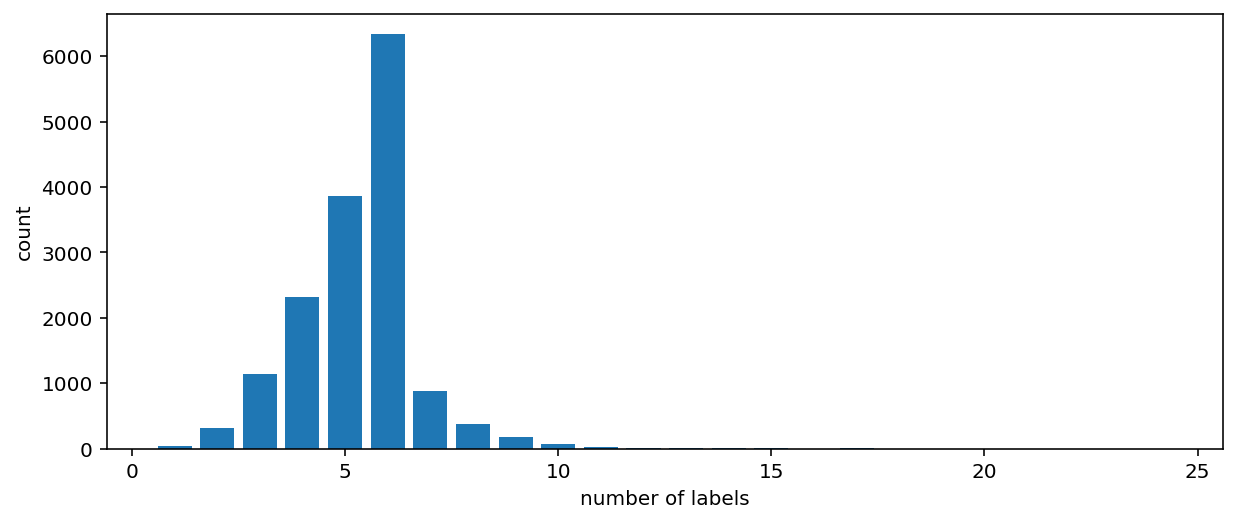

In [74]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(hist.index, hist.values)
ax.set_xlabel("number of labels")
ax.set_ylabel("count")

## Co-occurrence

In [96]:
labels_dok = train_labels.todok()

In [121]:
# this dictionary maps an example # to a list of labels
example_to_labels = defaultdict(list)
for key in labels_dok.keys():
    example_to_labels[key[0]].append(key[1])
example_to_labels = dict(example_to_labels)

In [122]:
# this dictionary maps a pair of labels to how many times those two labels co-occur
pairs = defaultdict(int)
for labels in dd.values():
    for pair in combinations(sorted(labels), 2):
        pairs[tuple(pair)] += 1
cooccurrences = list(pairs.values())

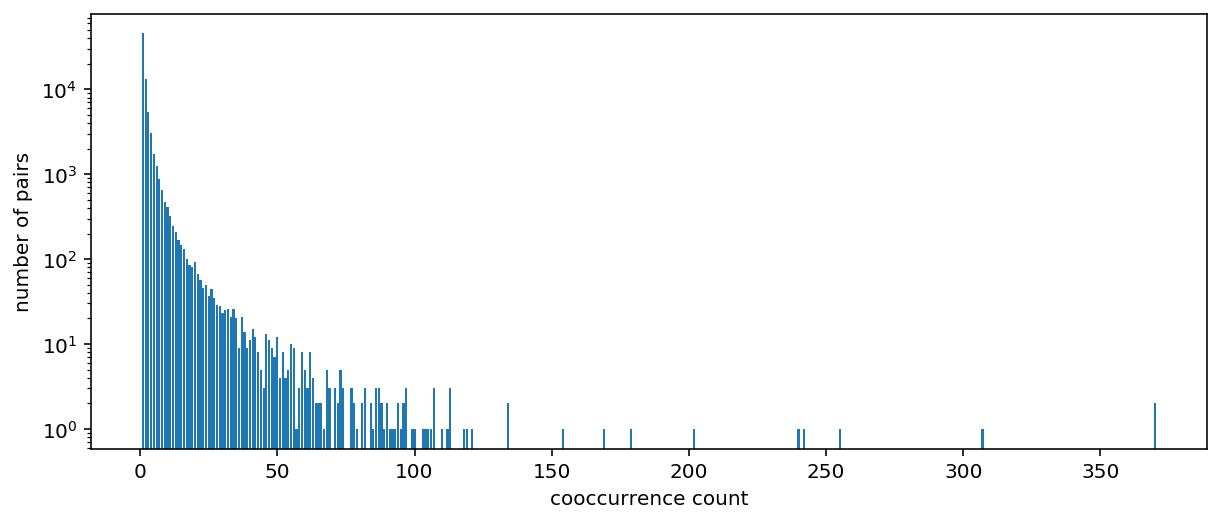

In [134]:
hist_cooccurrences = pd.Series(cooccurrences).value_counts()
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(hist_cooccurrences.index, hist_cooccurrences.values)
ax.set_xlabel("cooccurrence count")
ax.set_ylabel("number of pairs")
ax.set_yscale("log")